#<i>Herschel</i> Reference Survey Exploratory Analysis: DecompIR Model Fits

This notebook takes a look at the fitting results for the <i>Herschel</i> Reference Survey galaxies using the model from DecompIR (Mullaney+11).

This model is a template fitting model that contains several AGN templates as well as 5 host galaxy templates that were constructed based on the SEDs from Brandl et al 2006. For our fitting purposes I chose the mean AGN template to use along with the 5 host galaxy templates. I also threw in the SED from Arp 220 which represents a ULIRG. 

Fitting was done by maximizing the likelihood for which we used a Gaussian. For each source we calculated the 'AGN fraction' to the IR luminosity by simply integrating the best fit AGN template and dividing by the total luminosity.

Best fit parameters and uncertainties are located in the file 'final_fit_results_decompir_sb_and_arp220_hrs.csv'

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn

sn.set_context('notebook')
sn.set_style('darkgrid')

In [18]:
# Upload the fitting results
hrs_fits = pd.read_csv('/Users/ttshimiz/Github/bat-agn-sed-fitting/analysis/decompir_results/hrs_sb+arp220/final_fit_results_decompir_sb_and_arp220_hrs.csv', index_col=0)

Lets look at the best fit parameter distributions.

First 8-1000 micron luminosity:

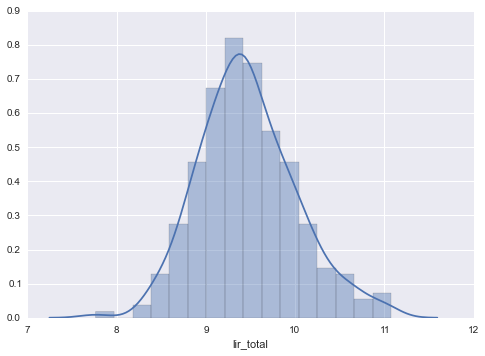

In [6]:
sn.distplot(hrs_fits['lir_total'])

Looks like a Gaussian distribution with a slight tail towards high luminosity. Median looks to be out $10^{9.25} L_{\odot}$ with a spread of about 0.5 dex.

In [7]:
print 'Median LIR = ', hrs_fits['lir_total'].median()
print 'Sigma LIR = ', hrs_fits['lir_total'].std()

Median LIR =  9.4229145704
Sigma LIR =  0.543009324526


Now lets break it up into the two components: LSB and LAGN which are the starburst and AGN components. These aren't saved in the file specifically, rather what we have is the total luminosity and the AGN fraction. So LAGN is just the AGN fraction multiplied by the total and the starburst luminosity is what's leftover after subtracting out the AGN.

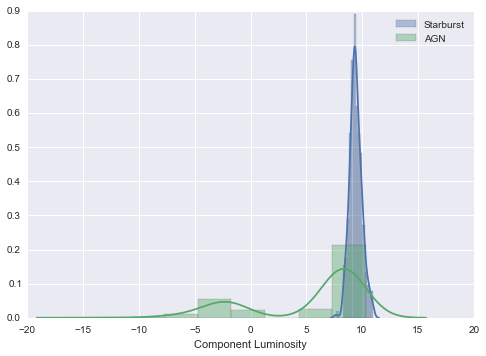

In [9]:
hrs_fits['lir_agn'] = np.log10(hrs_fits['agn_frac']*10**(hrs_fits['lir_total']))
hrs_fits['lir_sb'] = np.log10((1-hrs_fits['agn_frac'])*10**(hrs_fits['lir_total']))
ax = sn.distplot(hrs_fits['lir_sb'])
sn.distplot(hrs_fits['lir_agn'])
ax.set_xlabel('Component Luminosity')
ax.legend(['Starburst', 'AGN'])

It looks like some of the sources that have no AGN luminosity are causing the distribution to be skewed very far to low luminosity. Lets just look at the distribution for the AGN fraction.

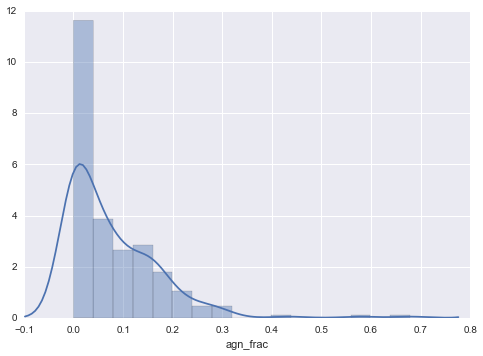

In [10]:
sn.distplot(hrs_fits['agn_frac'])

Interesting that in a sample full of non-AGN galaxies that there seems to be a fair fraction that have up to about 30% of the LIR attributed to an AGN based on the DecompIR model. I wonder if this is an indication of the systematic error associated with this model. Or are there some AGN in the HRS sample??

In [16]:
print 'Median AGN Fraction = ', hrs_fits['agn_frac'].median()
print 'Sigma AGN Fraction = ', hrs_fits['agn_frac'].std()
print ''
print 'Median Starburst LIR = ', hrs_fits['lir_sb'].median()
print 'Sigma Starburt LIR = ', hrs_fits['lir_sb'].std()
print ''
print 'Median AGN LIR = ', hrs_fits['lir_agn'].median()
print 'Sigma AGN LIR = ', hrs_fits['lir_agn'].std()

Median AGN Fraction =  0.0473908979352
Sigma AGN Fraction =  0.0938417229883

Median Starburst LIR =  9.38059353131
Sigma Starburt LIR =  0.540640968085

Median AGN LIR =  7.95510392671
Sigma AGN LIR =  5.20847106637


The median AGN fraction however is only 5% with a standard deviation of 9% so 0 is within 1-sigma. Statistically then the DecompIR model does a fairly good job. It would be interesting to look at some of the sources that have relatively high AGN fractions and see if there is any evidence for an AGN. 

Lets list these sources.

In [19]:
hrs_fits[hrs_fits['agn_frac'] > 0.2]

,agn_frac,agn_name,agn_norm,chi2,host_name,host_norm,lir_total
Name,,,,,,,
HRS138,0.577160,Mean,-1.498478,294.223373,SB2,-2.314048,8.931161
HRS144,0.253248,Mean,-0.603798,24.065033,SB5,-1.163781,10.183591
HRS159,0.214595,Mean,-1.506109,45.523461,SB1,-1.361748,9.615763
HRS173,0.232466,Mean,-1.221895,92.852595,SB1,-1.122268,9.602681
HRS180,0.266816,Mean,-2.021957,68.059486,SB1,-2.002067,8.742766
HRS186,0.678563,Mean,-1.670564,95.673012,SB2,-2.675510,8.772030
HRS205,0.232871,Mean,-0.453553,40.728393,SB1,-0.354912,10.370266
HRS253,0.278517,Mean,-1.584478,-15.723931,Arp220,-2.938641,9.357059
HRS27,0.284067,Mean,-1.652743,75.111402,SB1,-1.670403,9.411726


I'll make a note to look into some of these sources to see if they are known AGN or have evidence for one. We also need to make sure the SEDs have reasonable fits. Several of these galaxies match up with the galaxies I suspected might contain an AGN based on the Casey 2012 model fits. These galaxies are HRS 144, 205, 253, and 88. 

HRS 88 (NGC 4123): Based on NED this galaxy has a nuclear starburst. SDSS also classifies it as a starburst based on optical emission lines. Doesn't appear to be any broad emission lines in the spectra.

HRS 144 (NGC 4388): Definite AGN and is actually in our BAT AGN sample!

HRS 205 (NGC 4536): Seems to be just a normal spiral galaxy. No evidence for nuclear activity.

HRS 253 (NGC 4684): Also just a normal star-forming galaxy.

While these fits don't provide any dust properties for the galaxies such as temperature and mass, we can look at what types of host galaxy SEDs were used to fit them. In other words which of the 6 host galaxy SEDs were used for the HRS.

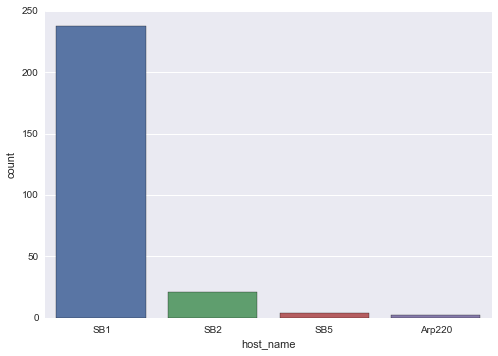

In [21]:
sn.countplot(hrs_fits['host_name'])

Looks like as expected the vast majority of the HRS galaxies were fit with the SB1 host galaxy template, which represents a more 'normal' star-forming galaxy. In fact there were literally 0 sources fit with the SB3 and SB4 templates, indicating this sample is quite devoid of highly starbursting galaxies. 